In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


# Completo datos faltantes del DataFrame

Completo el dataframe con los datos faltantes en las columnas de m² (`metrostotales` y `metroscubiertos`).
Si no tengo una de las dos, reemplazo con el valor de la otra. Si tengo ambos, no hago nada. Si no tengo ninguna, filtro dicha propiedad del análisis.

In [5]:
props_a_filtrar = df.loc[df['metroscubiertos'].isna() & df['metrostotales'].isna()][['metrostotales', 'metroscubiertos']].size

print(f'Hay que filtrar {props_a_filtrar} propiedades ya que no hay datos de m²')

Hay que filtrar 0 propiedades ya que no hay datos de m²


In [6]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      51467
metroscubiertos    17400
dtype: int64

In [7]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [8]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      0
metroscubiertos    0
dtype: int64

In [9]:
df['precioUSD'] = df['precio'] / 20
df['preciom2USD'] = df['precioUSD'] / df['metrostotales']

In [10]:
quantile_1 = df['preciom2USD'].quantile(.01)
quantile_99 = df['preciom2USD'].quantile(.99)
quantile_995 = df['preciom2USD'].quantile(.995)
#df_filtrado = df.loc[df['preciom2USD'] < quantile_995]
df_filtrado = df.loc[(df['preciom2USD'] < quantile_99)]

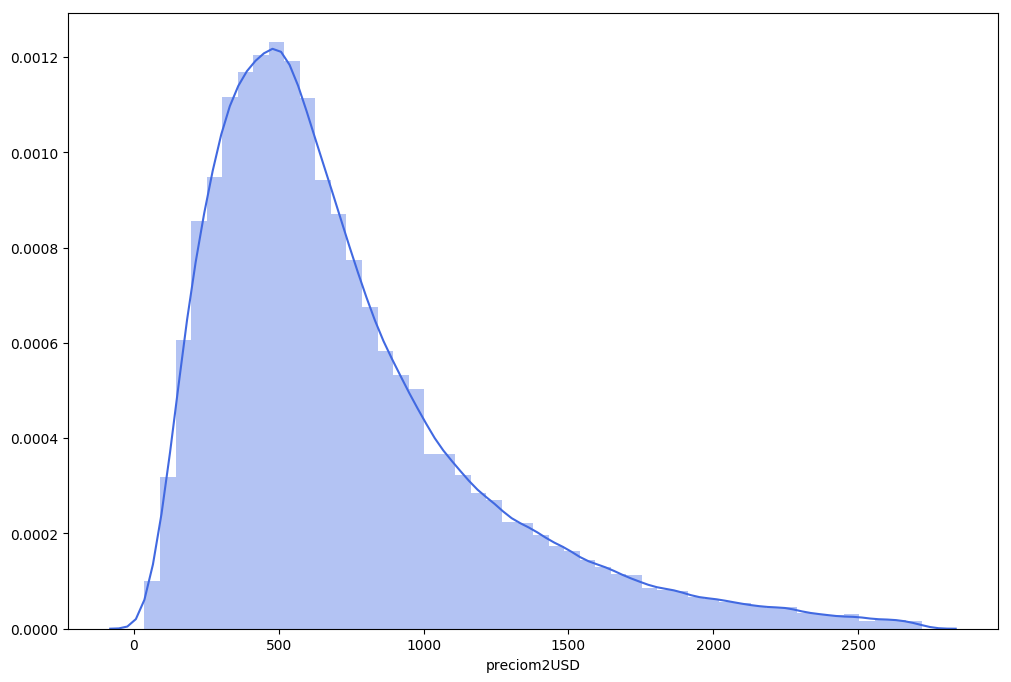

In [11]:
sns.distplot(df_filtrado['preciom2USD'], color='royalblue');

Luego del filtrado nos quedó una distribución más uniforme.

In [12]:
 print(f'Eliminamos {len(df) - len(df_filtrado)} propiedades')

Eliminamos 2402 propiedades


Como vamos a hacer un analisis por ciudades, revisamos tener un número considerable de propiedades por ciudad, para no caer en un análisis basado en muy pocas publicaciones.

In [13]:
df = df_filtrado
del df_filtrado

In [14]:
def histogram_preciom2USD(df, analisisstr):
    plt.title(f'Histograma con percentiles {analisisstr}', fontsize=20)

    quantileMuyBajo = df['preciom2USD'].quantile(.02)
    quantileBajo = df['preciom2USD'].quantile(.25)
    quantileMedio = df['preciom2USD'].quantile(.65)
    quantileCaro = df['preciom2USD'].quantile(.95)

    plt.hist(df['preciom2USD'], bins=50, color='b', edgecolor='k', alpha=0.65)
    plt.axvline(quantileMuyBajo, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(quantileBajo, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(quantileMedio, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(quantileCaro, color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
    plt.text(quantileMuyBajo * 1.02, max_ylim * 0.97, f'Limite: {quantileMuyBajo:.0f}')
    plt.text(quantileBajo * 1.02, max_ylim * 0.97, f'Limite: {quantileBajo:.0f}')
    plt.text(quantileMedio * 1.02, max_ylim * 0.97, f'Limite: {quantileMedio:.0f}')
    plt.text(quantileCaro * 1.02, max_ylim * 0.97, f'Limite: {quantileCaro:.0f}');

In [15]:
residencial = ['Apartamento', 'Casa en condominio', 'Casa', 'Edificio', 'Duplex', 'Departamento Compartido']

In [16]:
df['esResidencial'] = df['tipodepropiedad'].isin(residencial)

In [17]:
df['preciom2USD'].loc[df['esResidencial']].describe().T

count    218432.000000
mean        734.926782
std         460.138281
min          40.000000
25%         410.416667
50%         614.285714
75%         930.000000
max        2718.750000
Name: preciom2USD, dtype: float64

# Analisis características en el precio de las residencias

## Influencia de las caracteristicas en Apartamentos

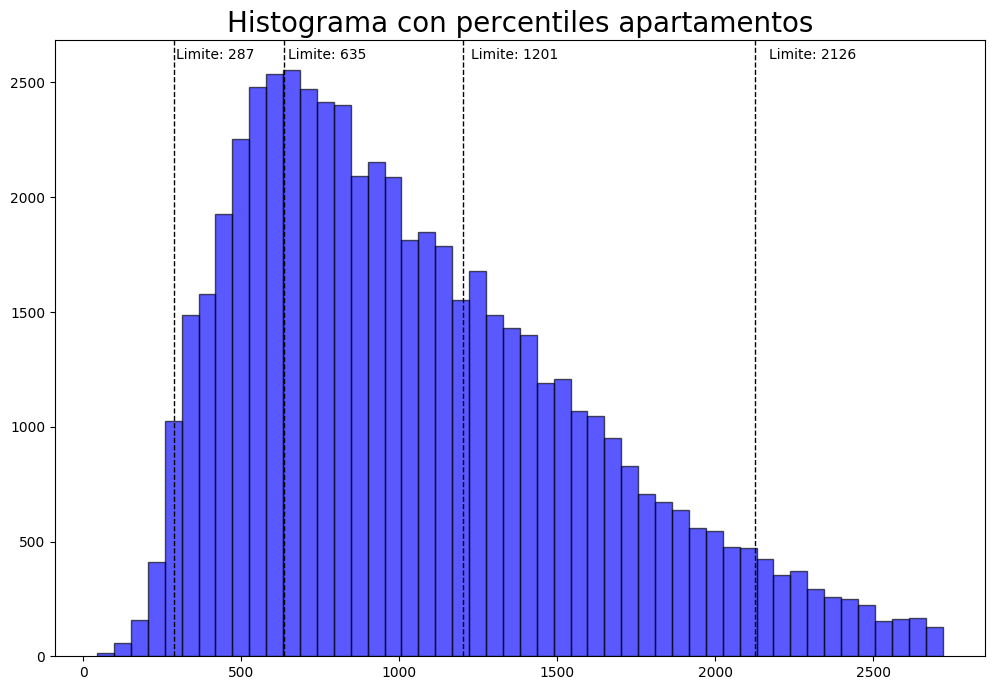

In [18]:
histogram_preciom2USD(df.loc[df['tipodepropiedad'] == 'Apartamento'], 'apartamentos')

In [19]:
def split_grupos_preciom2USD(df):
    limiteGrupoMuyBarato = df['preciom2USD'].quantile(.02) 
    limiteGrupoBarato = df['preciom2USD'].quantile(.25)
    limiteGrupoMedio = df['preciom2USD'].quantile(.65)
    limiteGrupoCaro = df['preciom2USD'].quantile(.95)

    muyBajo = df.loc[df['preciom2USD'] < limiteGrupoMuyBarato]
    bajo = df.loc[(df['preciom2USD'] >= limiteGrupoMuyBarato) & (df['preciom2USD'] < limiteGrupoBarato)]
    medio = df.loc[(df['preciom2USD'] >= limiteGrupoBarato) & (df['preciom2USD'] < limiteGrupoMedio)]
    alto = df.loc[(df['preciom2USD'] >= limiteGrupoMedio) & (df['preciom2USD'] < limiteGrupoCaro)]
    muyAlto = df.loc[df['preciom2USD'] >= limiteGrupoCaro]
    
    return muyAlto, alto, medio, bajo, muyBajo

In [20]:
def precios_chart(df, analisisstr):
    from math import pi
    
    # number of variable
    categories=list(df)[1:]
    
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(90)
    plt.yticks([0.25, 0.5, 0.75,1], ["25%","50%","75%","100%"], color="grey", size=10)
    plt.ylim(0,.5)
    


    # precios muy altos
    values=df.loc[0].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="precios muy altos", color='purple')
    ax.fill(angles, values, 'purple', alpha=0.05)
    
    # precios altos
    values=df.loc[1].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="precios altos", color='blue')
    ax.fill(angles, values, 'blue', alpha=0.2)

    # precios medios
    values=df.loc[2].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="precios medios", color='red')
    ax.fill(angles, values, 'red', alpha=0.2)
    
    # precios bajos
    values=df.loc[3].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="precios bajos", color='green')
    ax.fill(angles, values, 'green', alpha=0.2)

    # precios muy bajos
    values=df.loc[4].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="precios muy bajos", color='orange')
    ax.fill(angles, values, 'orange', alpha=0.2)

    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    ax.set_title(f'Influencia de las caracteristicas en el precio de {analisisstr}', fontsize=16)

In [21]:
def caracteristicas(df, preciosstr):
    columns = ['gimnasio', 'piscina', 'escuelas cercanas', 'usos multiples', 'centros comerciales cercanos']
    c = pd.DataFrame([df['gimnasio'].mean(),
    df['piscina'].mean(),
    df['escuelascercanas'].mean(),
    df['usosmultiples'].mean(),
    df['centroscomercialescercanos'].mean()], columns=[preciosstr]).T
    c.columns = columns
    
    return c

In [22]:
preciosMuyAltos, preciosAltos, preciosMedios, preciosBajos, preciosMuyBajos = split_grupos_preciom2USD(df.loc[df['tipodepropiedad'] == 'Apartamento'])

In [23]:
print(f'Hay {len(preciosMuyBajos)} en la franja de precios bajos')
print(f'Hay {len(preciosBajos)} en la franja de precios bajos')
print(f'Hay {len(preciosMedios)} en la franja de precios medios')
print(f'Hay {len(preciosAltos)} en la franja de precios altos')
print(f'Hay {len(preciosMuyAltos)} en la franja de precios altos')

Hay 1124 en la franja de precios bajos
Hay 12938 en la franja de precios bajos
Hay 22499 en la franja de precios medios
Hay 16874 en la franja de precios altos
Hay 2813 en la franja de precios altos


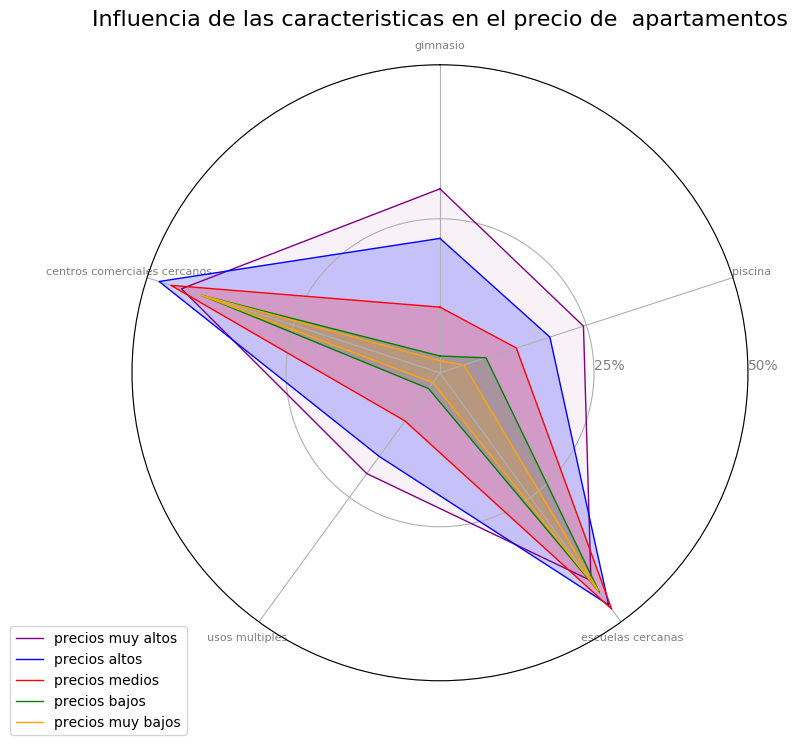

In [24]:
df_caracteristicas = caracteristicas(preciosMuyAltos, 'precios muy altos').append(
                        caracteristicas(preciosAltos, 'precios altos').append(
                            caracteristicas(preciosMedios, 'precios medios').append(
                                caracteristicas(preciosBajos, 'precios bajos').append(
                                    caracteristicas(preciosMuyBajos, 'precios muy bajos'))))).reset_index()
precios_chart(df_caracteristicas, ' apartamentos')

## Influencia de las caracteristicas en las casas

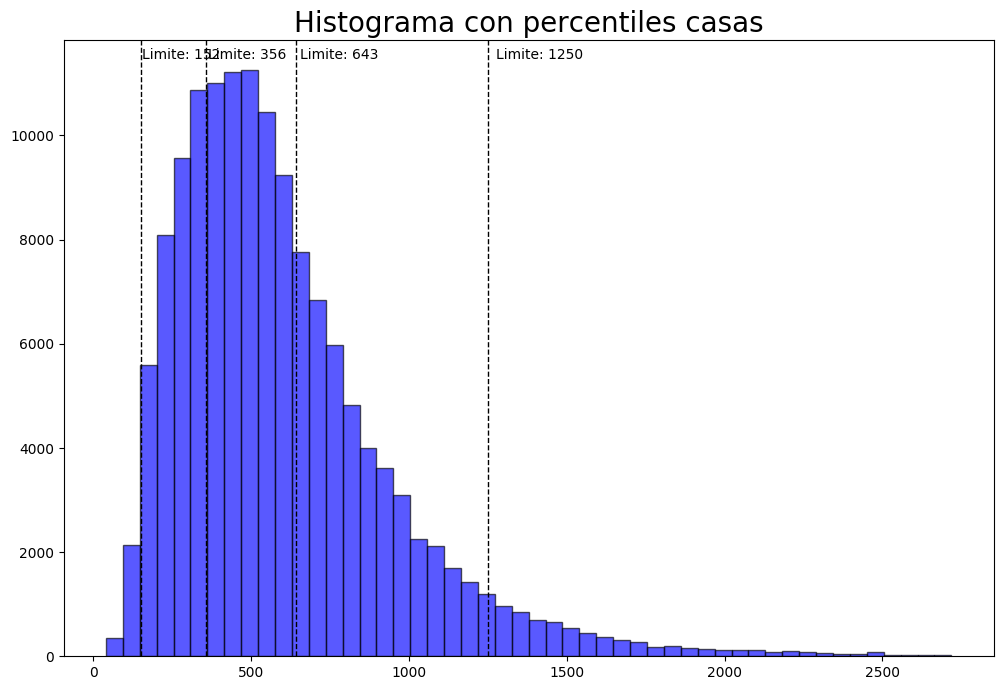

In [25]:
histogram_preciom2USD(df.loc[df['tipodepropiedad'] == 'Casa'], 'casas')

In [26]:
preciosMuyAltos, preciosAltos, preciosMedios, preciosBajos, preciosMuyBajos = split_grupos_preciom2USD(df.loc[df['tipodepropiedad'] == 'Casa'])

In [27]:
print(f'Hay {len(preciosMuyBajos)} en la franja de precios bajos')
print(f'Hay {len(preciosBajos)} en la franja de precios bajos')
print(f'Hay {len(preciosMedios)} en la franja de precios medios')
print(f'Hay {len(preciosAltos)} en la franja de precios altos')
print(f'Hay {len(preciosMuyAltos)} en la franja de precios altos')

Hay 2828 en la franja de precios bajos
Hay 32512 en la franja de precios bajos
Hay 56372 en la franja de precios medios
Hay 42334 en la franja de precios altos
Hay 7323 en la franja de precios altos


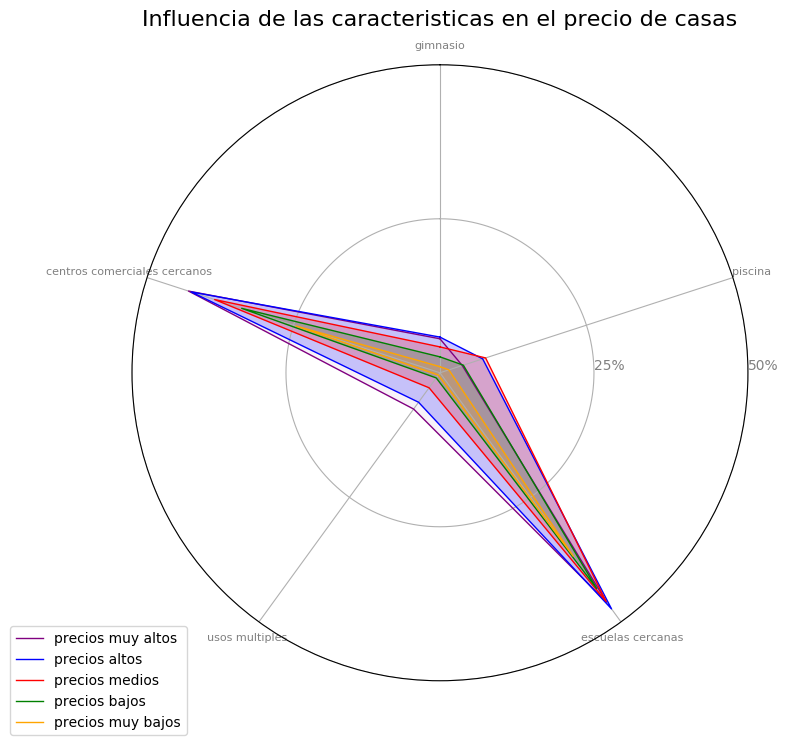

In [28]:
df_caracteristicas = caracteristicas(preciosMuyAltos, 'precios muy altos').append(
                        caracteristicas(preciosAltos, 'precios altos').append(
                            caracteristicas(preciosMedios, 'precios medios').append(
                                caracteristicas(preciosBajos, 'precios bajos').append(
                                    caracteristicas(preciosMuyBajos, 'precios muy bajos'))))).reset_index()
precios_chart(df_caracteristicas, 'casas')